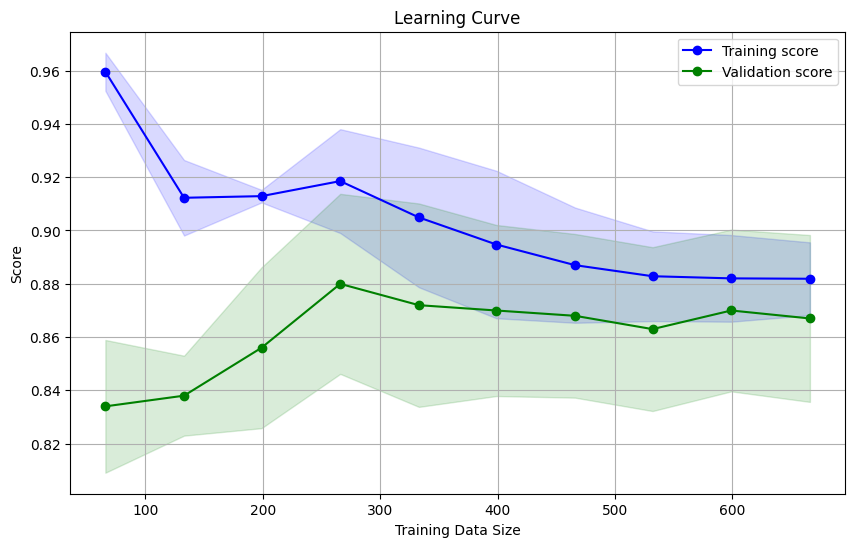

In [11]:
# Adjust parameters for faster execution
# Use a simpler model and reduce the number of cross-validation folds to speed up the process

from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

# Setup the simpler model
# 1. Create simulated classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# 2. Setup the model for which we want to plot the learning curve
model = RandomForestClassifier(random_state=42)

# Define training sizes
train_sizes = np.linspace(0.1, 1.0, 10)

model = LogisticRegression(random_state=42, max_iter=100)

# Compute the learning curves with fewer CV folds to speed up the process
train_sizes, train_scores, validation_scores = learning_curve(
    model, X, y, train_sizes=train_sizes, cv=3, scoring='accuracy', n_jobs=-1)

# Recalculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Recalculate mean and standard deviation for test set scores
validation_mean = np.mean(validation_scores, axis=1)
validation_std = np.std(validation_scores, axis=1)

# Plot the adjusted learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training score', color='blue', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.15)

plt.plot(train_sizes, validation_mean, label='Validation score', color='green', marker='o')
plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, color='green', alpha=0.15)

plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()
plt.show()


Logistic Regression Brier score: 0.0568
Random Forest Brier score: 0.0192
Naive Bayes Brier score: 0.0692


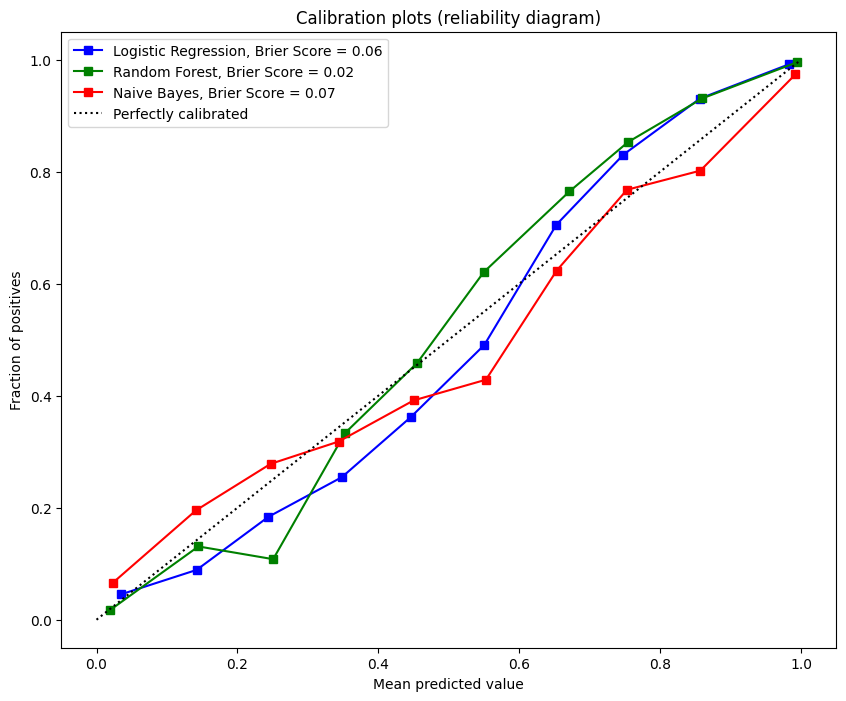

In [17]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.calibration import calibration_curve, CalibratedClassifierCV
from sklearn.metrics import brier_score_loss
import matplotlib.pyplot as plt

# 1. Generate synthetic classification data
X, y = make_classification(n_samples=20000, n_features=10, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Train classifiers
# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Naive Bayes Classifier
nb = GaussianNB()
nb.fit(X_train, y_train)

# 3. Generate Calibration Plots
# Prepare figure
plt.figure(figsize=(10, 8))

color = ['blue', 'green', 'red']
cnt = 0

# For each classifier, plot calibration curve
for model, name in [(lr, 'Logistic Regression'), (rf, 'Random Forest'), (nb, 'Naive Bayes')]:
    # Predict probabilities
    prob_pos = model.predict_proba(X_test)[:, 1]
    # Calibration curve
    fraction_of_positives, mean_predicted_value = calibration_curve(y_test, prob_pos, n_bins=10)
    
    # Brier score
    brier = brier_score_loss(y_test, prob_pos)
    print(f"{name} Brier score: {brier:.4f}")

    # Plot
    plt.plot(mean_predicted_value, fraction_of_positives, "s-", label=f"{name}, Brier Score = {brier:.2f}", color=color[cnt])
    cnt += 1
    
    

# Plot perfectly calibrated
plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")

plt.ylabel("Fraction of positives")
plt.xlabel("Mean predicted value")
plt.title('Calibration plots (reliability diagram)')
plt.legend()

plt.show()
